In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 999

# Import Datasets

In [2]:
df = pd.read_csv("datasets/weatherAUS.csv", parse_dates=["Date"])

Lakukan Ekstraksi pada kolom Date

In [3]:
# buat kolom year yang berisi data tahun hasil ekstraksi kolom date
df['year'] = pd.DatetimeIndex(df['Date']).year

# buat kolom month yang berisi hasil ekstraksi bulan pada kolom date
df['month'] = pd.DatetimeIndex(df['Date']).month

# buat kolom day yang berisi hari
df['day'] = pd.DatetimeIndex(df['Date']).day

# hapus kolom Date karena sudah tidak terpakai
df = df.drop(columns="Date")

# tampilkan dataframe
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,year,month,day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No,2008,12,5


# Cek Data yang bolong

,missing_value,%
Location,0,0.00
MinTemp,637,0.45
MaxTemp,322,0.23
Rainfall,1406,0.99
Evaporation,60843,42.79
Sunshine,67816,47.69
WindGustDir,9330,6.56
WindGustSpeed,9270,6.52
WindDir9am,10013,7.04
WindDir3pm,3778,2.66


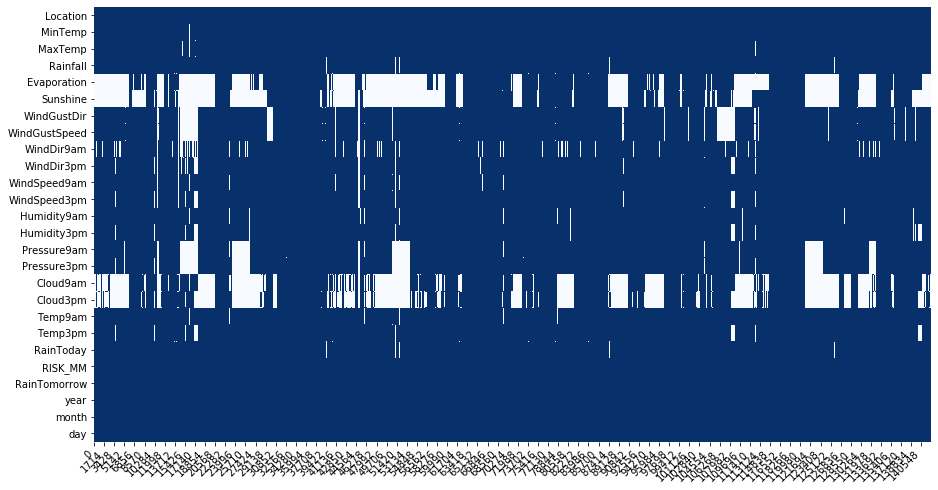

In [5]:
plot_missing_value(df, return_df=True)

# Cek kolom-kolom dalam data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,year,month,day
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682,2012.758926,6.402544,15.715084
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969,2.541256,3.426506,8.798150
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,2007.000000,1.000000,1.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000,2017.000000,12.000000,31.000000


# Visualize
### Data Target

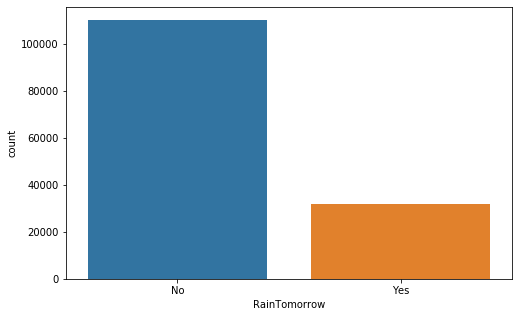

In [9]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(df["RainTomorrow"])
plt.show()

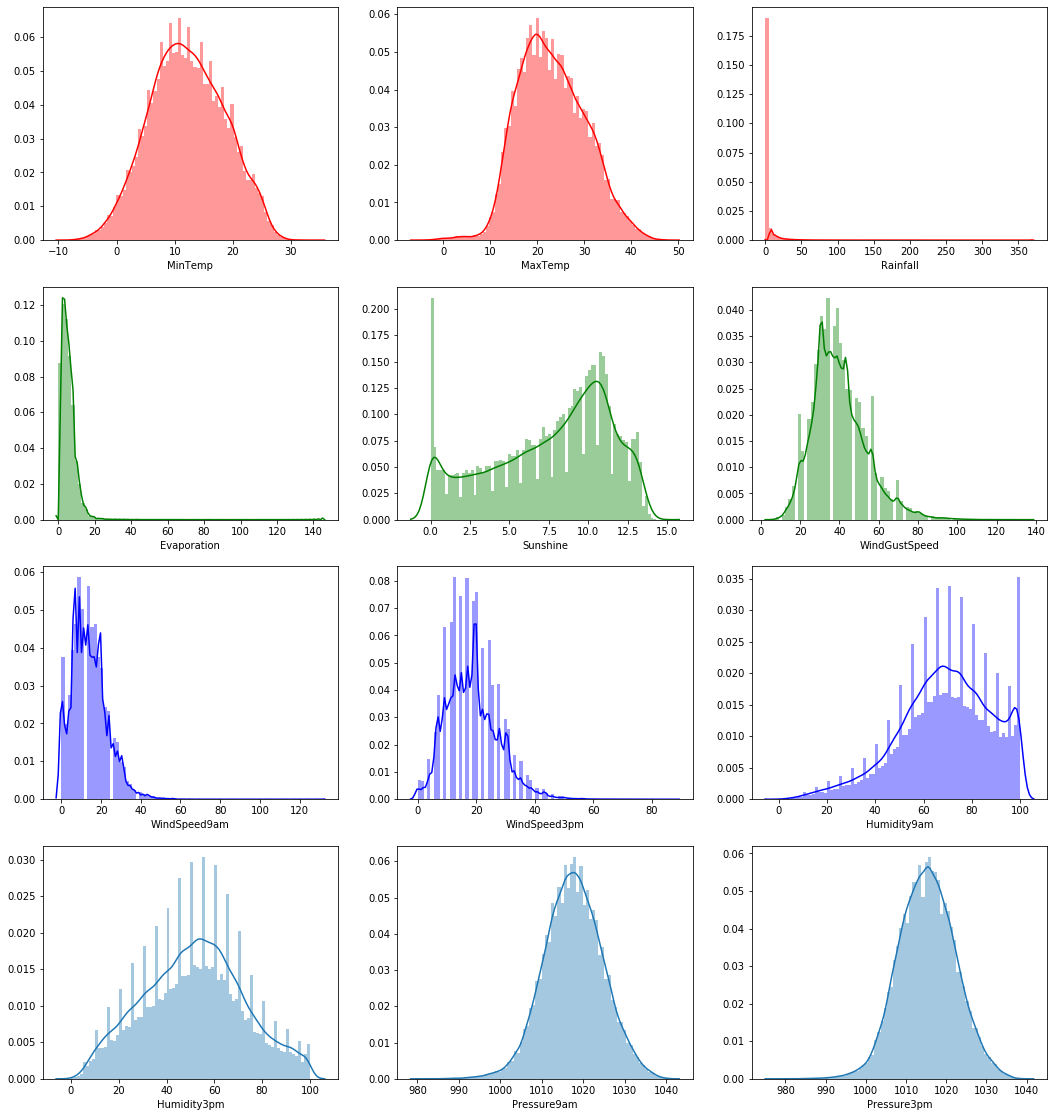

In [26]:
plt.figure(figsize=(18, 30))

plt.subplot(6,3,1)
ax = sns.distplot(df["MinTemp"], bins=80, color='r')

plt.subplot(6,3,2)
ax = sns.distplot(df["MaxTemp"], bins=80, color='r')

plt.subplot(6,3,3)
ax = sns.distplot(df["Rainfall"], bins=80, color='r')

plt.subplot(6,3,4)
ax = sns.distplot(df["Evaporation"], bins=80, color='g')

plt.subplot(6,3,5)
ax = sns.distplot(df["Sunshine"], bins=80, color='g')

plt.subplot(6,3,6)
ax = sns.distplot(df["WindGustSpeed"], bins=80, color='g')

plt.subplot(6,3,7)
ax = sns.distplot(df["WindSpeed9am"], bins=80, color='b')

plt.subplot(6,3,8)
ax = sns.distplot(df["WindSpeed3pm"], bins=80, color='b')

plt.subplot(6,3,9)
ax = sns.distplot(df["Humidity9am"], bins=80, color='b')

plt.subplot(6,3,10)
ax = sns.distplot(df["Humidity3pm"], bins=80)

plt.subplot(6,3,11)
ax = sns.distplot(df["Pressure9am"], bins=80)

plt.subplot(6,3,12)
ax = sns.distplot(df["Pressure3pm"], bins=80)

plt.show()